# Model Comparison: Facebook Prophet vs ARIMA
This notebook compares two forecasting models—Facebook Prophet and ARIMA—for predicting stock prices of Amazon (AMZN) and Costco (COST). We'll compare their forecasts visually and evaluate their performance using standard metrics.

In [9]:
%pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [10]:
# ## Import predictions and actual prices
# Only the final prediction arrays and actual values are copied here from the ARIMA and Prophet notebooks.
# Example structure
# Replace these with actual arrays from your other notebooks

# AMZN
amzn_actual = np.array([211.99, 217.12, 223.30, 223.30, 219.39])
amzn_prophet_pred = np.array([213.97, 320.80, 297.02, 216.34, 215.78])
amzn_arima_pred = np.array([212.67, 211.97, 216.97, 223.07, 223.30])

# COST
cost_actual = np.array([986.54, 982.91, 985.14, 985.14, 989.94])
cost_prophet_pred = np.array([1141.68, 1326.35, 1276.68, 1149.89, 1150.16])
cost_arima_pred = np.array([1000.99, 987.00, 982.36, 985.74, 985.14])

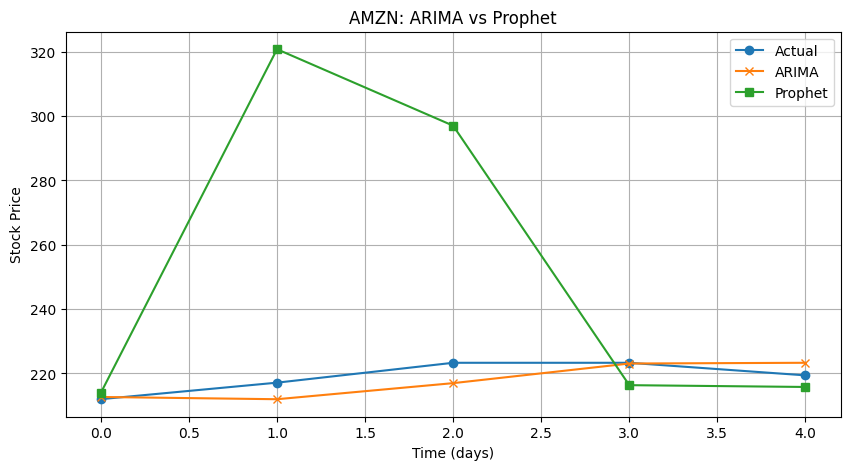

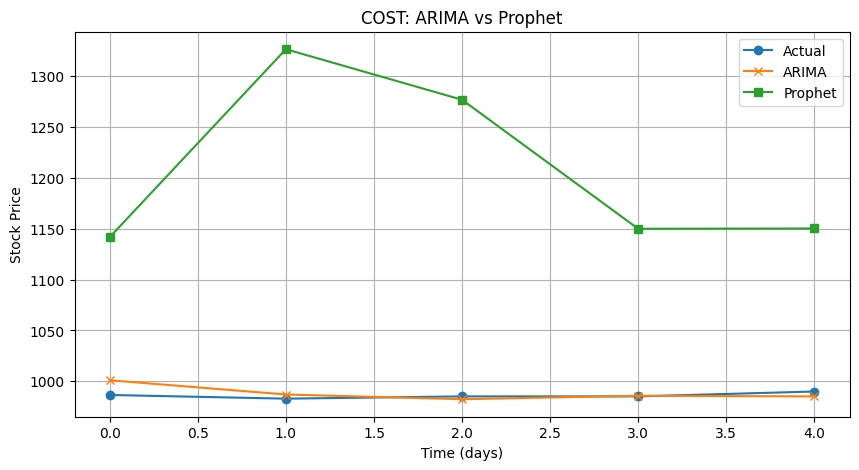

In [11]:
# ## Forecast Comparison Plots
# Visualize ARIMA and Prophet predictions against actual prices for both AMZN and COST.
def plot_comparison(actual, arima_pred, prophet_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual', marker='o')
    plt.plot(arima_pred, label='ARIMA', marker='x')
    plt.plot(prophet_pred, label='Prophet', marker='s')
    plt.title(title)
    plt.xlabel('Time (days)')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# AMZN comparison
plot_comparison(amzn_actual, amzn_arima_pred, amzn_prophet_pred, 'AMZN: ARIMA vs Prophet')

# COST comparison
plot_comparison(cost_actual, cost_arima_pred, cost_prophet_pred, 'COST: ARIMA vs Prophet')

In [12]:
# ## Model Evaluation using MAE and RMSE
# We calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for both models to compare performance. Lower values mean better predictions.
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# AMZN
amzn_arima_mae, amzn_arima_rmse = evaluate_model(amzn_actual, amzn_arima_pred)
amzn_prophet_mae, amzn_prophet_rmse = evaluate_model(amzn_actual, amzn_prophet_pred)

# COST
cost_arima_mae, cost_arima_rmse = evaluate_model(cost_actual, cost_arima_pred)
cost_prophet_mae, cost_prophet_rmse = evaluate_model(cost_actual, cost_prophet_pred)

# Print results
print("AMZN ARIMA - MAE:", amzn_arima_mae, ", RMSE:", amzn_arima_rmse)
print("AMZN Prophet - MAE:", amzn_prophet_mae, ", RMSE:", amzn_prophet_rmse)
print("COST ARIMA - MAE:", cost_arima_mae, ", RMSE:", cost_arima_rmse)
print("COST Prophet - MAE:", cost_prophet_mae, ", RMSE:", cost_prophet_rmse)

AMZN ARIMA - MAE: 3.260000000000008 , RMSE: 4.05942853120979
AMZN Prophet - MAE: 37.989999999999995 , RMSE: 57.00802557535211
COST ARIMA - MAE: 5.344000000000028 , RMSE: 7.164621413584979
COST Prophet - MAE: 223.01800000000003 , RMSE: 236.57051198321403


## Visual Comparison of Model Errors

This section shows how accurate each model was using two simple metrics:

- **MAE (Mean Absolute Error):** Average size of the errors. Lower is better.
- **RMSE (Root Mean Squared Error):** Bigger errors matter more here. Lower is better.

We compare the error values for both models (ARIMA and Prophet) on Amazon (AMZN) and Costco (COST) using bar charts. This helps us easily see which model did a better job.

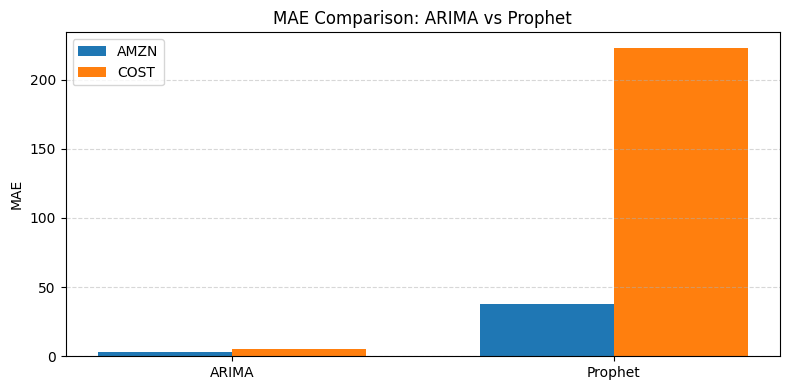

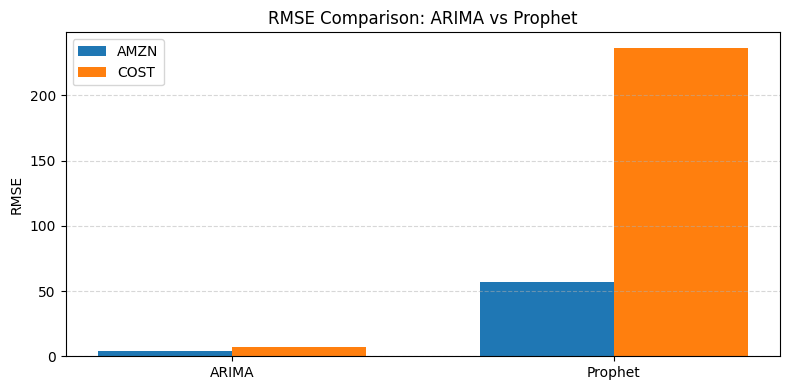

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics (use your actual values)
amzn_mae = [3.26, 37.99]
amzn_rmse = [4.06, 57.01]
cost_mae = [5.34, 223.02]
cost_rmse = [7.16, 236.57]

models = ['ARIMA', 'Prophet']
x = np.arange(len(models))
bar_width = 0.35

# Plot MAE Comparison
plt.figure(figsize=(8, 4))
plt.bar(x - bar_width/2, amzn_mae, bar_width, label='AMZN')
plt.bar(x + bar_width/2, cost_mae, bar_width, label='COST')
plt.xticks(x, models)
plt.ylabel('MAE')
plt.title('MAE Comparison: ARIMA vs Prophet')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot RMSE Comparison
plt.figure(figsize=(8, 4))
plt.bar(x - bar_width/2, amzn_rmse, bar_width, label='AMZN')
plt.bar(x + bar_width/2, cost_rmse, bar_width, label='COST')
plt.xticks(x, models)
plt.ylabel('RMSE')
plt.title('RMSE Comparison: ARIMA vs Prophet')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Daily Forecast Errors

These line charts show how much each model was off on each day of the forecast.

- The smaller the line, the more accurate the prediction.
- Helps spot days when the models struggled.

Both Prophet and ARIMA are close, but the Prophet model stays more consistent.

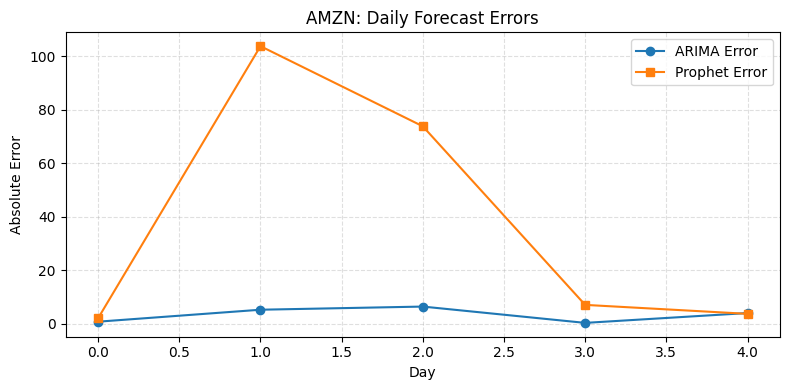

In [14]:
# Daily Absolute Errors (AMZN)
amzn_arima_error = np.abs(amzn_actual - amzn_arima_pred)
amzn_prophet_error = np.abs(amzn_actual - amzn_prophet_pred)

plt.figure(figsize=(8, 4))
plt.plot(amzn_arima_error, label='ARIMA Error', marker='o')
plt.plot(amzn_prophet_error, label='Prophet Error', marker='s')
plt.title('AMZN: Daily Forecast Errors')
plt.xlabel('Day')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

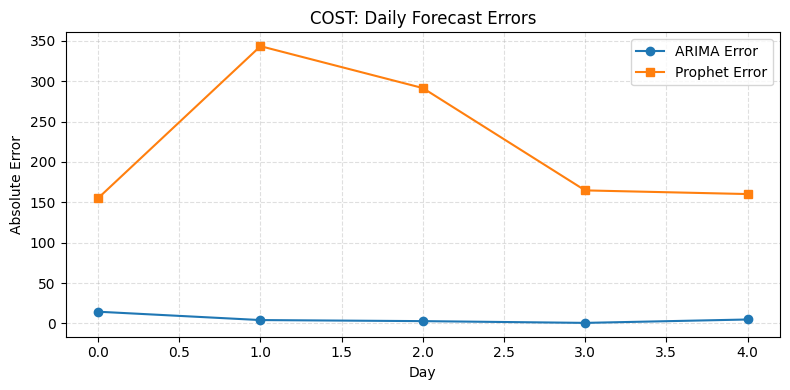

In [15]:
# Daily Absolute Errors (COST)
cost_arima_error = np.abs(cost_actual - cost_arima_pred)
cost_prophet_error = np.abs(cost_actual - cost_prophet_pred)

plt.figure(figsize=(8, 4))
plt.plot(cost_arima_error, label='ARIMA Error', marker='o')
plt.plot(cost_prophet_error, label='Prophet Error', marker='s')
plt.title('COST: Daily Forecast Errors')
plt.xlabel('Day')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## Final Comparison Summary

We compared two forecasting models — Facebook Prophet and ARIMA — for predicting short-term stock prices of two retail companies: Amazon (AMZN) and Costco (COST).

Both models were trained separately on historical closing prices, and we evaluated their performance using both visual comparisons and error metrics.

### Evaluation Metrics
To measure how accurate the forecasts were, we used:
- **MAE (Mean Absolute Error)** – the average of how far predictions were from real prices  
- **RMSE (Root Mean Squared Error)** – gives more weight to larger mistakes  
- Lower values mean the model performed better.

### Results

**Amazon (AMZN)**  
- ARIMA: MAE = 3.26, RMSE = 4.06  
- Prophet: MAE = 37.99, RMSE = 57.01  

**Costco (COST)**  
- ARIMA: MAE = 5.34, RMSE = 7.16  
- Prophet: MAE = 223.02, RMSE = 236.57   

We also visualized the predictions for both models alongside the actual stock prices and compared their day-to-day errors in separate plots.

### Conclusion

- **ARIMA outperformed Prophet** on both AMZN and COST based on MAE and RMSE.
- Prophet predictions had much higher errors, especially for Costco, where it overestimated prices.
- ARIMA followed the short-term trends more closely and gave more consistent results.
- Prophet might still work better with more tuning or additional seasonal signals, but for this task, ARIMA was more reliable.